In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import pearsonr, spearmanr

In [2]:
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered/PBMC_decon/owngroupbased/corr/CombinwithexistingBL22/cross_correlation/allct_towardsSM_dummy_mean_SM.txt_unique_withmincol.txtSM_7_result_dupindex_binnedstats.pkl_maxscore_CSxOut.txt_cytof_fixedDCm5trfixed.txt'
#Cytof
orderedcells=['NaiveCD4','cm4', 'em4','Tregs','NK','Mono','NaiveCD8','cm8','em8','ed8', 'nB','mB']

#Flow
#orderedcells=['NaiveCD4','cm4', 'em4','Tregs','NK','Mono', 'nB','mB']
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

df

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,nB_real,NaiveCD4_real,NaiveCD8_real,Tregs_real,cm4_real,em4_real,cm8_real,em8_real,ed8_real,PC_real
Mixture,,,,,,,,,,,,,,,,,,,,,
healthy_NU-03-bulk-PBMC,1958.533847,1280.883423,1434.861887,2102.020377,0,1664.649393,353.526601,1117.656533,954.354364,414.918647,...,0.0592,0.1142,0.0890,0.0029,0.097,0.095,0.019,0.089,0.054,0.0002
healthy_NU-14-bulk-PBMC,2214.938716,1499.435525,1369.719116,2651.122650,0,1482.540954,324.408234,982.631608,951.813092,457.028782,...,0.0844,0.0783,0.0996,0.0014,0.070,0.069,0.012,0.103,0.028,0.0001
healthy_NU-24-bulk-PBMC,2830.138199,1581.815727,1319.986457,1903.646622,0,1675.821281,313.852012,916.702306,825.094528,399.620167,...,0.0492,0.1510,0.0863,0.0050,0.122,0.146,0.010,0.072,0.045,0.0005
healthy_NU-31-bulk-PBMC,2229.238954,1455.690226,1354.135125,3317.195081,0,1553.938542,306.284979,962.022203,876.328854,374.172009,...,0.0558,0.1080,0.0840,0.0012,0.069,0.099,0.008,0.073,0.049,0.0001
healthy_NU-49-bulk-PBMC,2494.538780,1556.141979,1757.826739,1903.542561,0,1519.541623,317.515952,948.935087,920.198681,396.770258,...,0.0764,0.0984,0.1080,0.0019,0.084,0.166,0.012,0.082,0.045,0.0001
healthy_NU-50-bulk-PBMC,1936.684456,1194.068860,2034.710703,2086.801253,0,2344.558974,465.850604,1151.249531,974.204783,434.080048,...,0.0566,0.0620,0.0404,0.0027,0.043,0.059,0.009,0.035,0.018,0.0013
healthy_NU-51-bulk-PBMC,1973.132801,1294.337299,1273.415866,2858.307221,0,2119.886617,357.499295,993.025959,847.649696,477.514787,...,0.0650,0.1040,0.0520,0.0018,0.061,0.071,0.004,0.030,0.021,0.0002


In [3]:
gt = []
est = []
for col in df.columns:
    if '_real' in col:
        gt.append(col[:-5])
    else:
        est.append(col)
        
cells = list(set(gt) & set(est))

In [4]:
pearson_dic = {}
spearman_dic = {}
for cell in cells:
    cell_arr = np.array(df[cell])
    pearson_dic[cell] = []
    spearman_dic[cell] = []
    for cell_real in cells:
        cell_real_arr = np.array(df[cell_real + '_real'])
        pearson_corr = pearsonr(cell_arr, cell_real_arr)[0]
        spearman_corr = spearmanr(cell_arr, cell_real_arr)[0]
        pearson_dic[cell].append(pearson_corr)
        spearman_dic[cell].append(spearman_corr)
        
df_pearson = pd.DataFrame.from_dict(pearson_dic, orient='index', columns=cells)
df_spearman = pd.DataFrame.from_dict(spearman_dic, orient='index', columns=cells)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/mstats_basic.py:387: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [5]:
standardnamedict={"NaiveCD4": "Naive CD4 T", "NaiveCD8": "Naive CD8 T","CD4": "Naive CD4", "CD8": "Naive CD8","mB":"Memory B",'Mn':'Mono','CD14':'Mono','CD19':'B Cell','nB':'Naive B','PC':'PC','cm8':'CD8 TCM','em8':'CD8 TEM','m8':'CD8 memory','ed8':'CD8 TEMRA','cm4':'CD4 TCM','em4':'CD4 TEM','m4':'CD4 memory','mNeu':'PMN','Eo':'Eosinophil','Tr':'Tregs','Mg':'Megakaryocyte','Er':'Erythrocyte'}

In [6]:



df_pearson=df_pearson.reindex(orderedcells)
df_pearson=df_pearson[orderedcells]

df_spearman=df_spearman.reindex(orderedcells)
df_spearman=df_spearman[orderedcells]



df_pearson.rename(columns=standardnamedict,inplace=True)
df_pearson.rename(index=standardnamedict,inplace=True)

df_spearman.rename(columns=standardnamedict,inplace=True)
df_spearman.rename(index=standardnamedict,inplace=True)

df_pearson.head()

,Naive CD4 T,CD4 TCM,CD4 TEM,Tregs,NK,Mono,Naive CD8 T,CD8 TCM,CD8 TEM,CD8 TEMRA,Naive B,Memory B
Naive CD4 T,0.656619,0.734678,0.820096,0.532551,-0.472848,-0.653898,0.556509,-0.013520,0.357809,0.421343,-0.108256,-0.228220
CD4 TCM,0.701628,0.910562,0.828911,0.639351,-0.743078,-0.611209,0.671672,0.592473,0.577789,0.796922,-0.232222,-0.472822
CD4 TEM,0.518933,0.757155,0.613845,0.429529,-0.718516,0.020343,0.589653,0.718626,0.495582,0.620072,0.081918,-0.068953
Tregs,0.573806,0.844910,0.650564,0.632212,-0.715987,-0.656067,0.630388,0.749604,0.650376,0.773271,-0.235107,-0.627529
NK,-0.142561,-0.443985,-0.472957,-0.682531,0.956098,0.106905,-0.142555,-0.492608,-0.100139,-0.118834,0.073325,0.443739


In [7]:
df_pearson.to_csv(file + '_pearson.txt', sep='\t')
df_spearman.to_csv(file + '_spearman.txt', sep='\t')

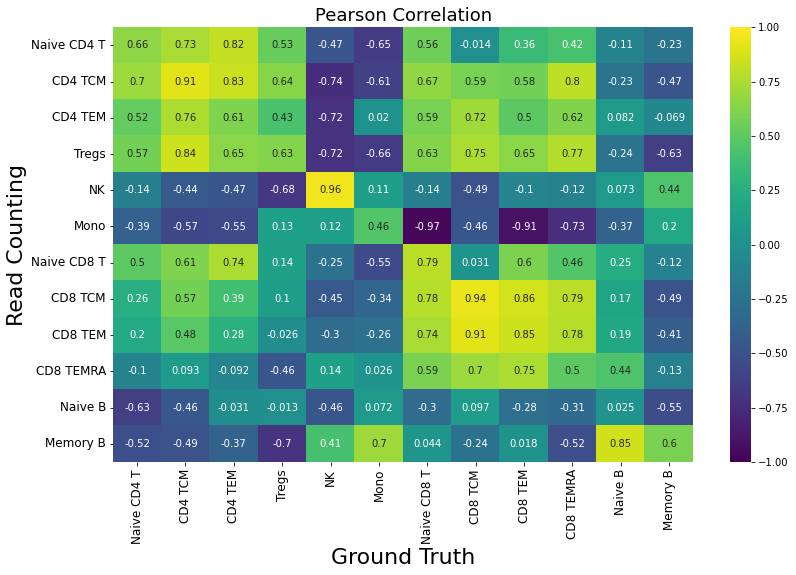

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(13, 8))

sns.heatmap(df_pearson, cmap='viridis', annot=True,annot_kws={"size": 10}, ax=ax, vmin=-1, vmax=1)
ax.set_xlabel('Ground Truth', fontsize=22)
ax.set_ylabel('Read Counting', fontsize=22)
ax.set_title('Pearson Correlation', fontsize=18)

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12,rotation=0)


plt.savefig(file + '_pearson.pdf', bbox_inches='tight')

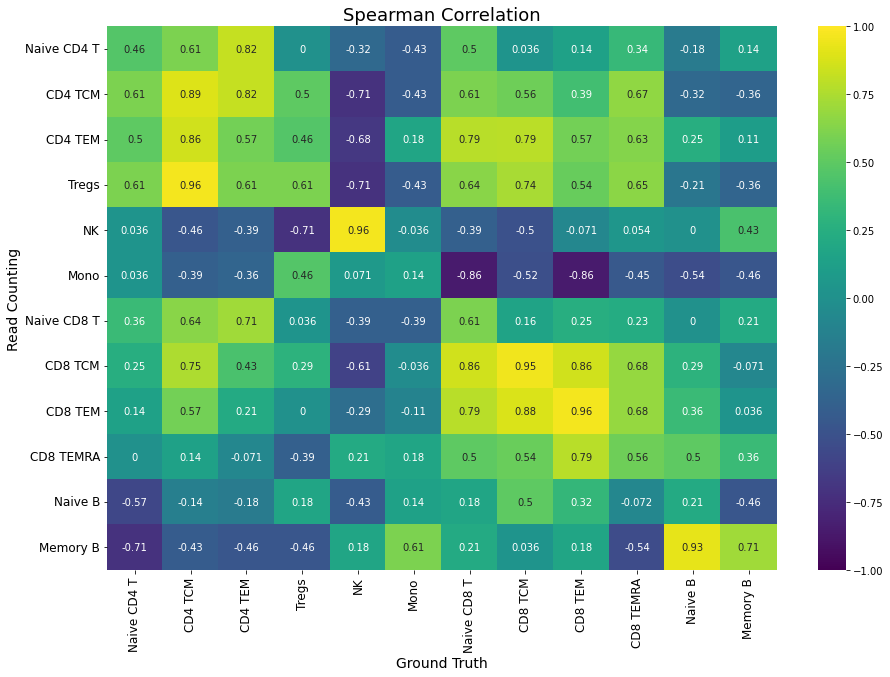

In [9]:
fig2, ax2 = plt.subplots(1, 1, figsize=(15, 10))

sns.heatmap(df_spearman, cmap='viridis', annot=True,annot_kws={"size": 10}, ax=ax2, vmin=-1, vmax=1)
ax2.set_xlabel('Ground Truth', fontsize=14)
ax2.set_ylabel('Read Counting', fontsize=14)
ax2.set_title('Spearman Correlation', fontsize=18)

ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 12,rotation=90)
ax2.set_yticklabels(ax2.get_ymajorticklabels(), fontsize = 12,rotation=0)

plt.savefig(file + '_spearman.pdf', bbox_inches='tight')